In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

In [5]:
list_tickers = ['FB', 'NFLX', 'TSLA']
database = yf.download(list_tickers, start='2025-01-01', end='2026-01-01')

[*********************100%***********************]  3 of 3 completed


In [6]:
database.head()

Price      Close                        High                        Low  \
Ticker        FB       NFLX        TSLA   FB       NFLX        TSLA  FB   
Date                                                                      
2025-01-02   NaN  88.672997  379.279999  NaN  89.858002  392.730011 NaN   
2025-01-03   NaN  88.105003  410.440002  NaN  89.883003  411.880005 NaN   
2025-01-06   NaN  88.179001  411.049988  NaN  89.282997  426.429993 NaN   
2025-01-07   NaN  87.918999  394.359985  NaN  88.800003  414.329987 NaN   
2025-01-08   NaN  87.500000  394.940002  NaN  88.622002  402.500000 NaN   

Price                             Open                        Volume  \
Ticker           NFLX        TSLA   FB       NFLX        TSLA     FB   
Date                                                                   
2025-01-02  87.699997  373.040009  NaN  89.550003  390.100006    NaN   
2025-01-03  87.988998  379.450012  NaN  89.313004  381.480011    NaN   
2025-01-06  87.168999  401.700012  NaN  88.875999  423.200012    NaN   
2025-01-07  86.911003  390.000000  NaN  87.938004  405.829987    NaN   
2025-01-08  87.300003  387.399994  NaN  88.000000  392.950012    NaN   

Price                            
Ticker          NFLX       TSLA  
Date                             
2025-01-02  23123000  109710700  
2025-01-03  29673000   95423300  
2025-01-06  34577000   85516500  
2025-01-07  26498000   75699500  
2025-01-08  23479000   73038800

In [7]:
data = database.dropna().pct_change( 1 ).dropna( ) 

In [8]:
data.head()

Price          Close                          High                      \
Ticker            FB      NFLX      TSLA        FB      NFLX      TSLA   
Date                                                                     
2025-06-27  0.008494  0.012589 -0.006600  0.004479  0.018366 -0.005165   
2025-06-30  0.005590  0.012100 -0.018447  0.004954  0.007361 -0.011417   
2025-07-01 -0.001976 -0.034000 -0.053359  0.020582 -0.001775 -0.060477   
2025-07-02 -0.003565 -0.006756  0.049682 -0.025238 -0.028997  0.035764   
2025-07-03  0.006559  0.009589 -0.000950  0.005203  0.001777  0.005113   

Price            Low                          Open                      \
Ticker            FB      NFLX      TSLA        FB      NFLX      TSLA   
Date                                                                     
2025-06-27  0.006014  0.016406 -0.018881  0.000249  0.021000 -0.000308   
2025-06-30  0.003736  0.015534 -0.002835  0.007472  0.018456 -0.014206   
2025-07-01  0.000496 -0.029511 -0.073879 -0.002176  0.005432 -0.067021   
2025-07-02 -0.001984 -0.008290  0.036186 -0.001263 -0.030839  0.047477   
2025-07-03  0.004970  0.006425  0.029425  0.004192 -0.003824  0.017145   

Price         Volume                      
Ticker            FB      NFLX      TSLA  
Date                                      
2025-06-27 -0.692098  0.562186  0.107235  
2025-06-30  1.539823 -0.193569 -0.138906  
2025-07-01 -0.606272  0.521094  0.891721  
2025-07-02  3.451327 -0.389459 -0.176461  
2025-07-03 -0.912525 -0.341971 -0.514224

In [9]:
data = data['Close']

In [10]:
data.head()

Ticker,FB,NFLX,TSLA
Date,,,
2025-06-27,0.008494,0.012589,-0.006600
2025-06-30,0.005590,0.012100,-0.018447
2025-07-01,-0.001976,-0.034000,-0.053359
2025-07-02,-0.003565,-0.006756,0.049682
2025-07-03,0.006559,0.009589,-0.000950


Mean Variance formula

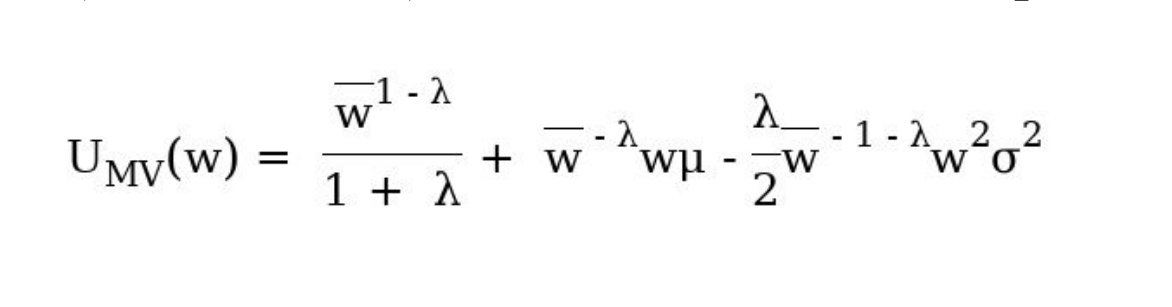

In [11]:
#Calculating mean variance function criterion

def MV_criterion(weights, data):
    #Parameters
    Lambda = 3
    W = 1
    Wbar = 1 + 0.25 / 10.0

    #Portfolio return
    portfolio_return = np.multiply(data, np.transpose(weights))
    portfolio_return = portfolio_return. sum (axis= 1 )

    #mean and volatility of the portfolio
    mean = np.mean(portfolio_return, axis= 0 )
    std = np.std(portfolio_return, axis= 0 )

    #Criterion
    criterion = Wbar ** ( 1 - Lambda) / ( 1 + Lambda) + Wbar ** (-Lambda) * W * mean - Lambda / 2 * Wbar ** ( -1 - Lambda) * W ** 2 * std ** 2

    return -criterion


In [12]:
#Implementation of portfolio optimization problem

split = int( 0.7 * len (data) ) #70% for training and 30% for testing
train_set = data.iloc[:split, :]
test_set = data.iloc[split:, :]

#Number of assets - .shape[1] : number of columns which is the number of assets.
n = data.shape[ 1 ]

In [13]:
train_set['FB'].head()

Date
2025-06-27    0.008494
2025-06-30    0.005590
2025-07-01   -0.001976
2025-07-02   -0.003565
2025-07-03    0.006559
Name: FB, dtype: float64

In [14]:
split

91

In [15]:
n

3

In [16]:
#Weight value

x0 = np.ones(n) #Vector of ones to initialize weights

In [17]:
# Optimization constraints - sum of the weight equal 100%
cons = ({ 'type' : 'eq' , 'fun' : lambda x: sum ( abs (x)) - 1 } )

In [18]:
#Bounds - Long only strategy
Bounds = [( 0 , 1 ) for i in range ( 0 , n) ]

In [19]:
import scipy.optimize as opt

res_MV = opt.minimize(MV_criterion, x0, method= "SLSQP" , args=(train_set), bounds=Bounds, constraints=cons, options={ 'disp' : True } ) 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.24031388545851154
            Iterations: 11
            Function evaluations: 44
            Gradient evaluations: 11


In [20]:
X_MV = res_MV.x

In [21]:
X_MV

array([2.49800181e-16, 0.00000000e+00, 1.00000000e+00])

Taylor approximation of function to find the mean-variance and the mean-variance skewness kurtosis criterion as it is tough to calculate utility function in its raw form
more the number of asset increases, the more we are closer to the systemic portfolio risk

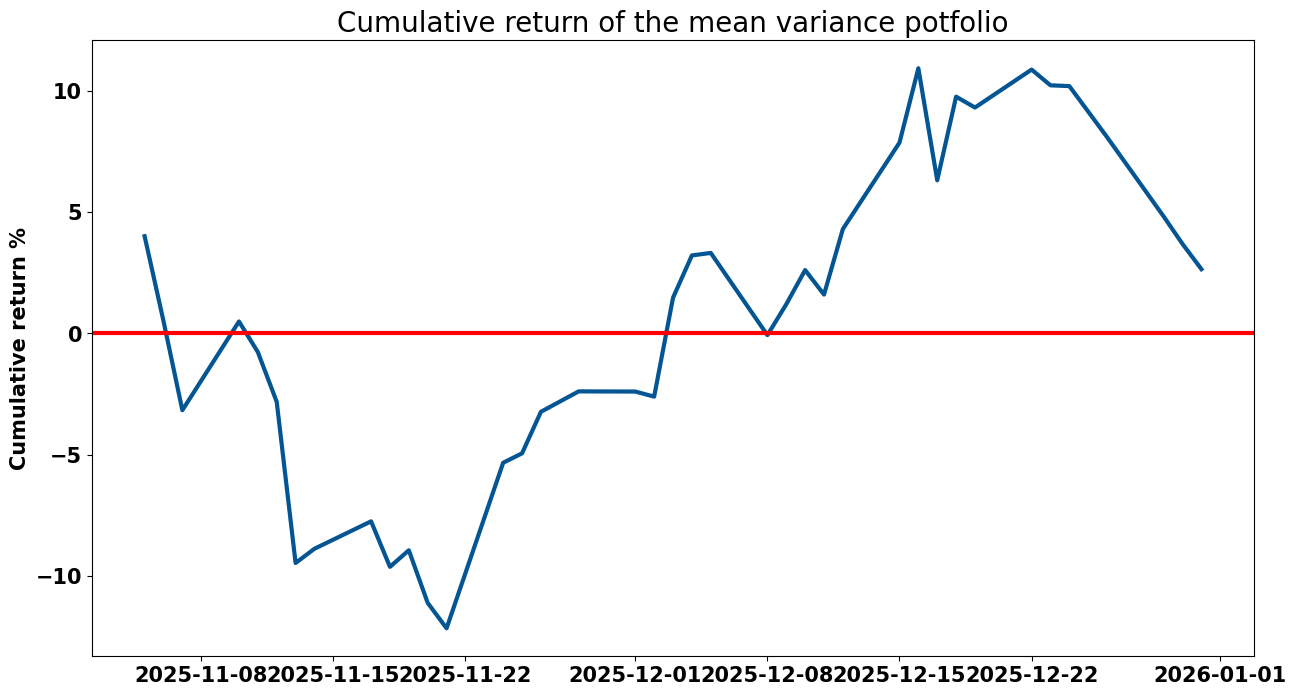

In [22]:
#Testing the performance on the test set

import matplotlib.pyplot as plt
portfolio_return_MV = np.multiply(test_set,np.transpose(X_MV))
portfolio_return_MV = portfolio_return_MV. sum (axis= 1 )  #sum of each column = portfolio return

plt.figure(figsize=( 15 , 8 ) )
plt.plot(np.cumsum(portfolio_return_MV)* 100 ,color= "#035593" , linewidth= 3 ) #Percentage cumulative return

plt.ylabel( "Cumulative return %" , size= 15 , fontweight= "bold" )
plt.xticks(size= 15 ,fontweight= "bold" )
plt.yticks(size= 15 ,fontweight= "bold" )
plt.title( "Cumulative return of the mean variance potfolio" , size=20)

plt.axhline( 0 , color= "r" ,linewidth= 3 )
plt.show() 

In [25]:
#Mean-variance-skewness-kurtosis criterion
from scipy.stats import kurtosis, skew
def SK_criterion(weights, data):
    """Output - Optimization portfolio criterion
    Inputs: -weight (type ndarray numpy): Weight for portfolio |
    data (type ndarray numpy): Returns of stocks"""

    Lambda = 3 #typical risk aversion - tendency to prefer a certain, safer outcome with lower potential rewards over a risky option with higher potential gains
    W = 1
    Wbar = 1 + 0.25 / 100

    #Portfolio return
    portfolio_return = np.multiply(data, np.transpose(weights))
    portfolio_return = portfolio_return.sum(axis=1)

    #mean, volatility, skewness and kurtosis of the portfolio
    mean = np.mean(portfolio_return, axis=0)
    std = np.std(portfolio_return, axis=0)
    skewness = skew(portfolio_return, axis=0) #asymmetry of the probability density function
    kurt = kurtosis(portfolio_return, axis=0) #"tailedness" of the probability density function

    #Criterion
    criterion = Wbar ** ( 1 - Lambda) / ( 1 + Lambda) + Wbar ** (-Lambda) * \
    W * mean - Lambda / 2 * Wbar ** ( -1 - Lambda) * W ** 2 * std ** 2 + \
    Lambda * (Lambda + 1 ) / ( 6 ) * Wbar ** ( -2 - Lambda) * W ** 3 * skewness -  \
    Lambda * (Lambda + 1 ) * (Lambda + 2 ) / ( 24 ) * Wbar ** ( -3 - Lambda) * W ** 4 * kurt

    return -criterion

In [26]:
#Optimization with mean-variance-skewness-kurtosis criterion

#Number of assets
n = data.shape[ 1 ]
# Initialization weight value
x0 = np.ones(n)
# Optimization constraints problem
cons = ({ 'type' : 'eq' , 'fun' : lambda x: sum ( abs (x)) - 1 })
# Set the bounds - Long only strategy
Bounds = [( 0 , 1 ) for i in range ( 0 , n)]
# Optimization problem solving
res_SK = opt.minimize(SK_criterion, x0, method= "SLSQP" ,
 args=(train_set), bounds=Bounds,
 constraints=cons, options={ 'disp' : True })
# Result for computations
X_SK = res_SK.x
X_SK

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.12345303863622437
            Iterations: 13
            Function evaluations: 59
            Gradient evaluations: 13


array([0.48917693, 0.16729729, 0.34352578])

48% - FB
16% - netflix
34% - Tesla

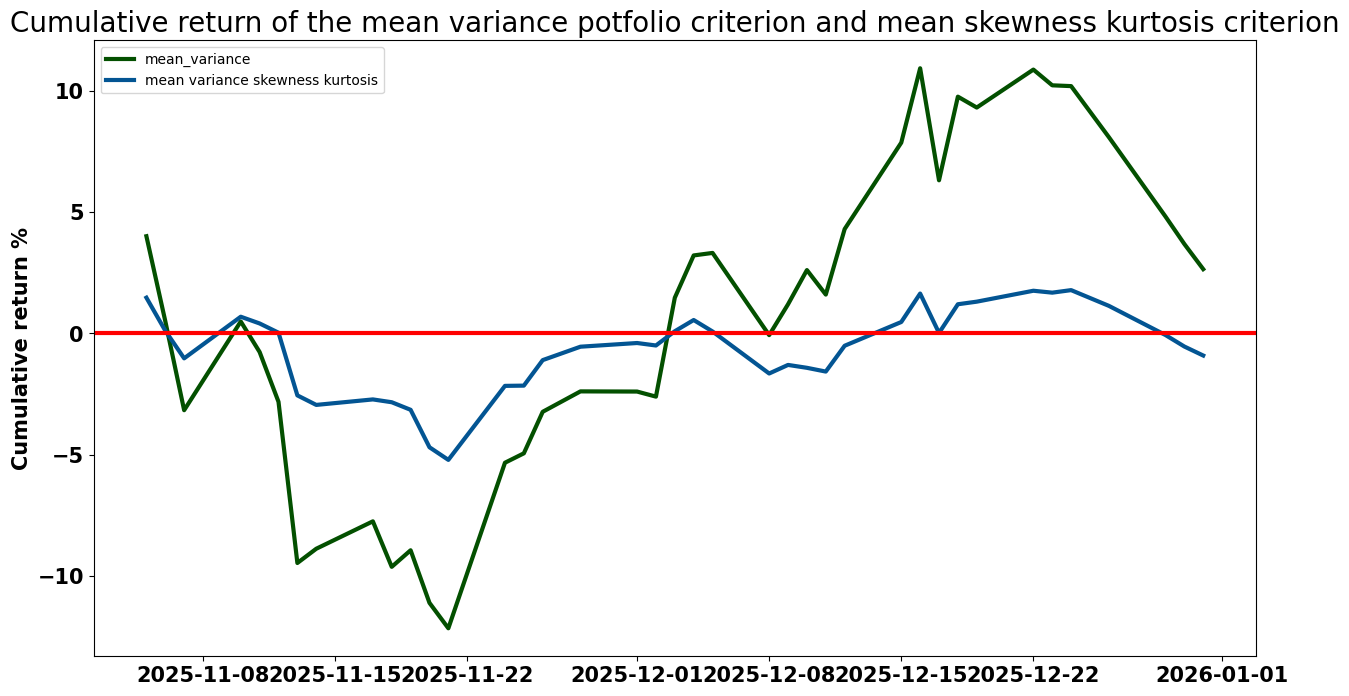

In [30]:
portfolio_return_MV = np.multiply(test_set,np.transpose(X_MV))
portfolio_return_MV = portfolio_return_MV. sum (axis= 1 )
portfolio_return_SK = np.multiply(test_set,np.transpose(X_SK))
portfolio_return_SK = portfolio_return_SK.sum (axis= 1 )  #sum of each column = portfolio return

plt.figure(figsize=( 15 , 8 ) )
plt.plot(np.cumsum(portfolio_return_MV)* 100 ,color= "#035000", linewidth= 3, label='mean_variance')
plt.plot(np.cumsum(portfolio_return_SK)* 100 ,color= "#035593" , linewidth= 3, label='mean variance skewness kurtosis') #Percentage cumulative return

plt.ylabel( "Cumulative return %" , size= 15 , fontweight= "bold" )
plt.xticks(size= 15 ,fontweight= "bold" )
plt.yticks(size= 15 ,fontweight= "bold" )
plt.title( "Cumulative return of the mean variance potfolio criterion and mean skewness kurtosis criterion" , size=20)
plt.legend()
plt.axhline( 0 , color= "r" ,linewidth= 3 )
plt.show()